In [20]:
from scipy.special import erfc as erfc; from scipy.special import erf as erf
import numpy as np; import math; import matplotlib.pyplot as plt; import pandas as pd

In [2]:
x = np.linspace(0.1, 10, num=1000)
t, q, C0, Ci = 60*3, 5, 1, 0
col_radius, phi, dispersivity   = 2.5, 0.3, 0.5     # radius, porosity, # dispersivity [cm] 
area = math.pi*(col_radius)**2
v = q/60/area/phi       #  cm/min to cm/sec         # print("advection velocity: " + str(v))
D = v * dispersivity                                # print(D)

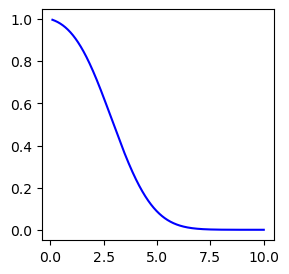

In [3]:
def ADE_type1_fun(x, t, v, D, C0):       #  Conc_time_type1                   (Parker and van Genuchten, 1984)
    C = C0*((1/2)*erfc((x - v*t)/(2*np.sqrt(D*t))) + (1/2)*np.exp(v*x/D)*erfc((x + v*t)/(2*np.sqrt(D*t))))
    return C
Conc_time_type1 = ADE_type1_fun(x, t, v, D, C0)
plt.figure(figsize=(3,3)); plt.plot(x, Conc_time_type1, color="blue"); plt.show()

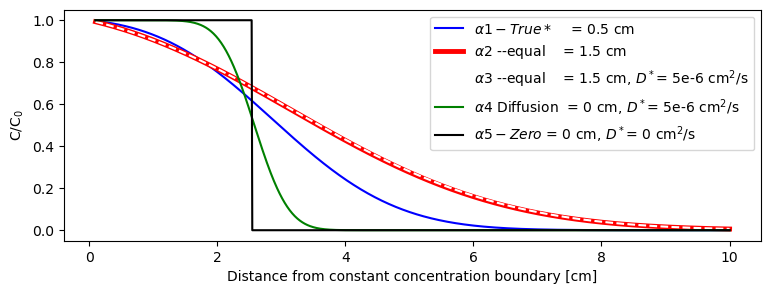

In [4]:
;                                       Conc_time_type1 = ADE_type1_fun(x, t, v, D, C0)               # 01     Dispersivity
Conc_D3x=1;                             Conc_D3x        = ADE_type1_fun(x, t, v, D*3, C0)             # 02 
Dstar = 5e-8*(100**2);                  Conc_D3x_w_diff = ADE_type1_fun(x, t, v, (D*3 + Dstar), C0)   # 03     D*[cm^2/sec]  
Conc_diff=1;                            Conc_diff       = ADE_type1_fun(x, t, v, Dstar, C0)           # 04     D = Dstar
C_advect=1;                             C_advect        = C0*np.ones(len(x))                          # 05     Just advection 
ind=1;                                  ind             = x > v * t ; C_advect[ind] = 0
plt.figure(figsize=(9, 3), dpi=100)
plt.plot(x, Conc_time_type1, label         = r'$\alpha 1 -True* $    = 0.5 cm', color="blue")
plt.plot(x, Conc_D3x, label                = r'$\alpha 2$ --equal    = 1.5 cm', color="red", linewidth=3.5)
plt.plot(x, Conc_D3x_w_diff, '--', label   = r'$\alpha 3$ --equal    = 1.5 cm, $D^*$= 5e-6 cm$^2$/s', color="white")
plt.plot(x, Conc_diff, label               = r'$\alpha 4$ Diffusion  = 0 cm, $D^*$= 5e-6 cm$^2$/s', color="green")
plt.plot(x, C_advect, 'k', label           = r'$\alpha 5 -Zero $ = 0 cm, $D^*$= 0 cm$^2$/s')          # __________________________
plt.xlabel('Distance from constant concentration boundary [cm]'); plt.ylabel(r'C/C$_0$'); plt.legend(); plt.show()

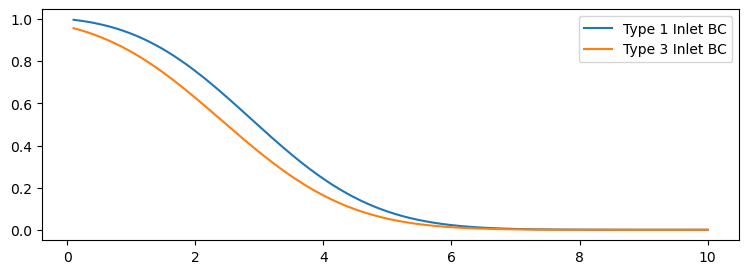

In [5]:
def ADE_type3_fun(x, t, v, D, C0):                                                            # _____________________Type 3 
    C = C0*((1/2)* erfc((x - v*t)/(2* np.sqrt(D*t))) + np.sqrt((v**2*t)/(math.pi*D))* np.exp(-(x - v*t)**2/(4*D*t)) - \
        (1/2)*(1 + (v*x/D) + (v**2*t/D))* np.exp(v*x/D)* erfc((x + v*t)/(2* np.sqrt(D*t))))   #   (Parker and van Genuchten, 1984 eq 9b)
    return C
Conc_time_type3 = ADE_type3_fun(x, t, v, D, C0)                                               # _____________________Type 3
plt.figure(figsize=(9,3)); plt.plot(x, Conc_time_type1, label='Type 1 Inlet BC'); plt.plot(x, Conc_time_type3, label='Type 3 Inlet BC'); plt.legend(); plt.show()

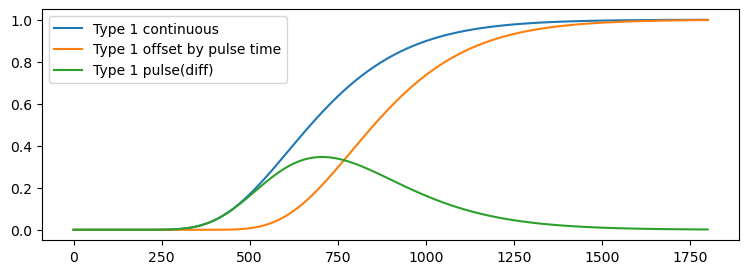

In [10]:
def ADE_type1_real_fun(x, t, v, D, C0):
    indices_below_zero = t <= 0
    if indices_below_zero.any() == True:
        t[indices_below_zero] = 1
    C = C0*((1/2)*erfc((x - v*t)/(2*np.sqrt(D*t))) + (1/2)*np.exp(v*x/D)*erfc((x + v*t)/(2*np.sqrt(D*t))))
    if indices_below_zero.any() == True:
        C[indices_below_zero] = 0
    return C
xout = 10;  ta = np.linspace(0.1, 60*30, num=100);    t_pulse = 60*3;     t_t0 = ta-t_pulse
Conc_time_type1_t        = ADE_type1_real_fun(xout, ta, v, D, C0)                          # continuous       
Conc_time_type1_t_t0     = ADE_type1_real_fun(xout, t_t0, v, D, C0)                        # offset by pulse time 
Conc_pulse_solution      = Conc_time_type1_t - Conc_time_type1_t_t0                        # Diff
plt.figure(figsize=(9,3)); plt.plot(ta, Conc_time_type1_t, label='Type 1 continuous'); plt.plot(ta, Conc_time_type1_t_t0, label='Type 1 offset by pulse time'); 
plt.plot(ta, Conc_pulse_solution, label='Type 1 pulse(diff)'); plt.legend(); plt.show()

In [15]:
tb = np.linspace(0.1, 60*30, num=3);
tb

array([1.0000e-01, 9.0005e+02, 1.8000e+03])

In [18]:
x = np.linspace(0.1, 10, num=3)
x

array([ 0.1 ,  5.05, 10.  ])

In [21]:
tb = pd.DataFrame(tb)
tb.to_csv("02.csv")